In [1]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import Hug, MCMC

In [2]:
def exppow_factory(loc=0, scale=1, p=4):
    def exppow(x):
        return 0.5 * jnp.sum( jnp.abs(x-loc)**p/scale**2 )
    return exppow

In [3]:
x = np.array([1.0,0.5])
kernel = Hug(potential_fn=exppow_factory(0, 1, 4), step_size=1, trajectory_length=0.1)
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, init_params =x, extra_fields=('potential_energy','accept_prob'))

  0%|          | 0/1000 [00:00<?, ?it/s]

initializing init_params for hug
initializing preconditioner for hug
finished init for hug


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1073.90it/s]


In [4]:
samples = mcmc.get_samples()
samples

DeviceArray([[ 0.9038734 ,  0.82020813],
             [ 0.7825725 ,  0.9294836 ],
             [ 0.67544264,  0.9736308 ],
             ...,
             [ 0.8405619 , -0.12142926],
             [ 0.8344017 , -0.35853168],
             [ 0.83493596,  0.1784852 ]], dtype=float32)

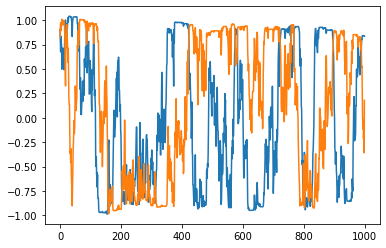

In [5]:
plt.plot(samples)

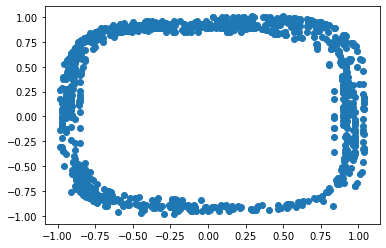

In [6]:
plt.scatter(x=samples[:,0], y=samples[:,1])

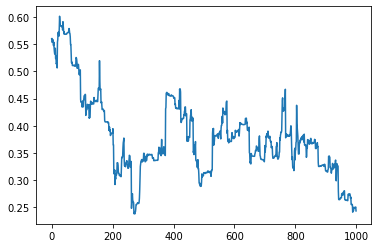

In [7]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

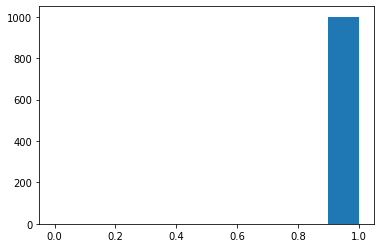

In [8]:
plt.hist(ap, range=(0,1))